In [1]:
import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

In [30]:
ISS_location = []
count = 0
while count <= 110:    
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
        resp = response.json()
        ISS_location.append(resp)
        time.sleep(10)
        count = count + 1

In [31]:
ISS_location[:5]

[{'message': 'success',
  'iss_position': {'longitude': '1.4069', 'latitude': '35.4110'},
  'timestamp': 1658593744},
 {'message': 'success',
  'iss_position': {'longitude': '2.0029', 'latitude': '35.8509'},
  'timestamp': 1658593754},
 {'message': 'success',
  'iss_position': {'longitude': '2.6059', 'latitude': '36.2872'},
  'timestamp': 1658593765},
 {'message': 'success',
  'iss_position': {'longitude': '3.2163', 'latitude': '36.7201'},
  'timestamp': 1658593775},
 {'message': 'success',
  'iss_position': {'longitude': '3.8043', 'latitude': '37.1289'},
  'timestamp': 1658593785}]

In [32]:
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}

latitudes = []
longitudes = []
times = []

for i in range(0,len(ISS_location)):
    latitudes.append(ISS_location[i]['iss_position']['latitude'])
    longitudes.append(ISS_location[i]['iss_position']['longitude'])
    times.append(ISS_location[i]['timestamp'])

ISS_dict['latitude'] = latitudes
ISS_dict['longitude'] = longitudes
ISS_dict['timestamp'] = times

ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [33]:
ISS_df.head()

,latitude,longitude,timestamp
0,35.4110,1.4069,1658593744
1,35.8509,2.0029,1658593754
2,36.2872,2.6059,1658593765
3,36.7201,3.2163,1658593775
4,37.1289,3.8043,1658593785


In [34]:
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)

In [35]:
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [36]:
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)

In [37]:
ISS_df.head()

,latitude,longitude,timestamp,coordinates
0,35.4110,1.4069,1.658594e+09,POINT (1.4069 35.411)
1,35.8509,2.0029,1.658594e+09,POINT (2.0029 35.8509)
2,36.2872,2.6059,1.658594e+09,POINT (2.6059 36.2872)
3,36.7201,3.2163,1.658594e+09,POINT (3.2163 36.7201)
4,37.1289,3.8043,1.658594e+09,POINT (3.8043 37.1289)


In [38]:
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_ISS))
geo_ISS.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


C:\Anaconda\envs\any\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,latitude,longitude,timestamp,coordinates
0,35.4110,1.4069,1.658594e+09,POINT (1.40690 35.41100)
1,35.8509,2.0029,1.658594e+09,POINT (2.00290 35.85090)
2,36.2872,2.6059,1.658594e+09,POINT (2.60590 36.28720)
3,36.7201,3.2163,1.658594e+09,POINT (3.21630 36.72010)
4,37.1289,3.8043,1.658594e+09,POINT (3.80430 37.12890)


In [39]:
geo_ISS.to_csv('Geo_ISS_df')

In [40]:
world = geopandas.read_file("custom.geo.json")
world.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."
1,1,Admin-0 country,2,United States of America,US1,1,2,Country,United States of America,USA,...,Americas,Northern America,North America,13,13,6,-99,1,USA.geojson,"MULTIPOLYGON (((-155.54211 19.08348, -155.6881..."
2,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,"MULTIPOLYGON (((-77.53466 23.75975, -77.78000 ..."
3,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,"MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ..."
4,1,Admin-0 country,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,...,Americas,Central America,Latin America & Caribbean,10,10,4,-99,1,CRI.geojson,"POLYGON ((-82.96578 8.22503, -83.50844 8.44693..."


In [41]:
world.describe

<bound method NDFrame.describe of      scalerank       featurecla  labelrank                sovereignt sov_a3  \
0            1  Admin-0 country          6                    Belize    BLZ   
1            1  Admin-0 country          2  United States of America    US1   
2            1  Admin-0 country          4               The Bahamas    BHS   
3            1  Admin-0 country          2                    Canada    CAN   
4            1  Admin-0 country          5                Costa Rica    CRI   
..         ...              ...        ...                       ...    ...   
170          1  Admin-0 country          3                    France    FR1   
171          1  Admin-0 country          2               New Zealand    NZ1   
172          1  Admin-0 country          3           Solomon Islands    SLB   
173          1  Admin-0 country          2          Papua New Guinea    PNG   
174          1  Admin-0 country          4                   Vanuatu    VUT   

     adm0_dif  le

In [42]:
world.shape

(175, 65)

<AxesSubplot:>

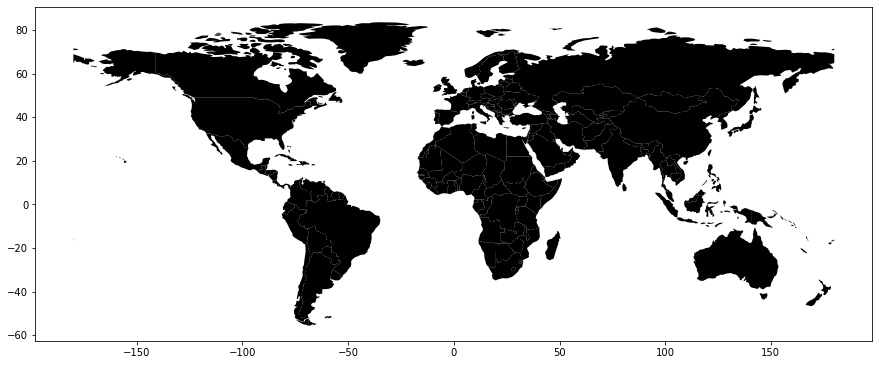

In [43]:
world.plot(figsize=(15,10), color='#000000')

<AxesSubplot:>

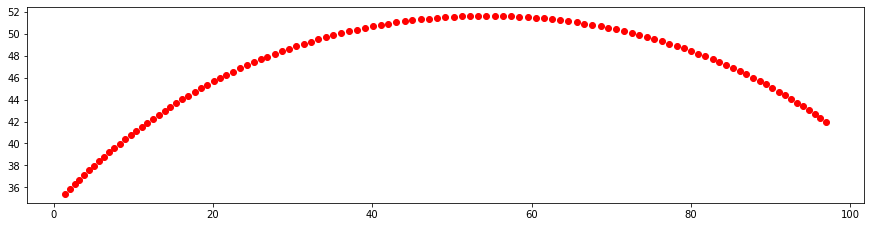

In [44]:
geo_ISS.plot(figsize=(15,10), color='#ff0000')

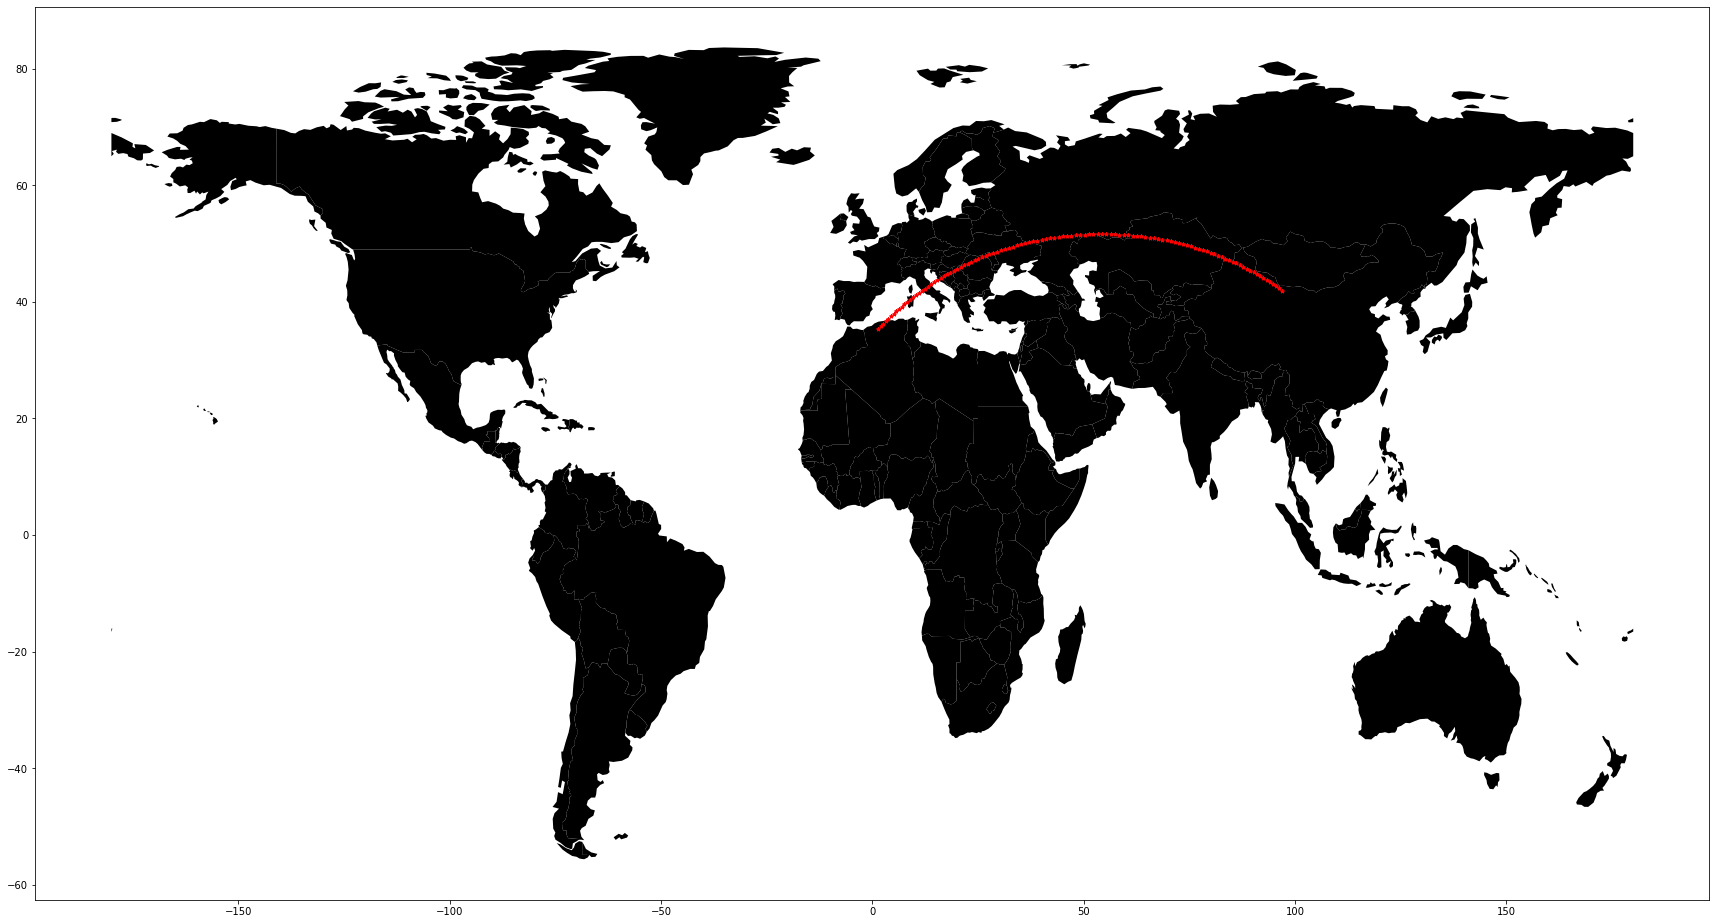

In [45]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = world.plot(ax=ax, color='#000000')

geo_ISS.plot(ax=base, color='#ff0000', marker="*", markersize=15);